In [1]:
!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
import scipy.io
from scipy.stats import mode
from scipy.spatial import distance_matrix
!mv mnist.mat?raw=true mnist.mat
mat = scipy.io.loadmat('mnist.mat')

--2021-11-28 03:59:47--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2021-11-28 03:59:47--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2021-11-28 03:59:47--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [2]:
import numpy as np
import matplotlib.pyplot as plt


trainX = mat['trainX'] #### train on this 
trainY = np.squeeze(mat['trainY'])

testX = mat['testX'] ### only evaluate on this 
testY = np.squeeze(mat['testY'])

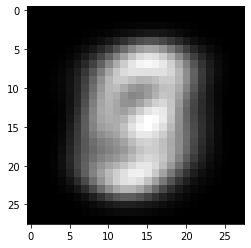

In [3]:
digitAvg = np.mean(trainX, axis =0)
zeromeanDigits = trainX - digitAvg

plt.imshow(np.reshape(digitAvg, (28, 28)), cmap='gray')

In [4]:
covmat = zeromeanDigits.T.dot(zeromeanDigits) / (zeromeanDigits.shape[0] - 1)

In [5]:
eigen_vals, eigen_vec = np.linalg.eig(covmat)
eig_pairs = [ (eigen_vals[i], eigen_vec[: , i] ) for i in range( len(eigen_vals) ) ]
eig_pairs.sort(key=lambda x : x[0] , reverse = True )

In [6]:
subspace = np.array([eig_pairs[i][1] for i in range(28*28)]).T

In [7]:
nr_test = 1000
nr_train = 10000

euclidianX = []
euclidianY = []

digits_train = trainX[:nr_train, :]
digits_test = testX[:nr_test , :]

for nr_components in range (1,31,1):
  dist = np.zeros((nr_train,nr_test))
  projections_Test = np.real(digits_test.dot(subspace[:, :nr_components]))
  projections_Train = np.real(digits_train.dot(subspace[:, :nr_components]))
  dist = distance_matrix(projections_Train[:nr_test,:], projections_Test[:nr_test, :])
  predictions = np.zeros(nr_test)
  for test_ix in range(nr_test):
    smallest_value_index = np.argsort(dist[:, test_ix])
    predictions[test_ix] = trainY[smallest_value_index[0]]

    predictions = predictions.astype(np.int64)

  difference = predictions - testY[:nr_test]
  percentage_success = (np.sum((difference == 0) * 1) / nr_test) * 100

  print("For component number %d, the percantage correct was: %.3f%%."%(nr_components, percentage_success))
  euclidianY.append(percentage_success)
  euclidianX.append(nr_components)

For component number 1, the percantage correct was: 25.000%.
For component number 2, the percantage correct was: 37.800%.
For component number 3, the percantage correct was: 41.300%.
For component number 4, the percantage correct was: 53.900%.
For component number 5, the percantage correct was: 59.600%.
For component number 6, the percantage correct was: 68.700%.
For component number 7, the percantage correct was: 73.100%.
For component number 8, the percantage correct was: 75.900%.
For component number 9, the percantage correct was: 76.800%.
For component number 10, the percantage correct was: 78.200%.
For component number 11, the percantage correct was: 79.300%.
For component number 12, the percantage correct was: 81.700%.
For component number 13, the percantage correct was: 82.600%.
For component number 14, the percantage correct was: 83.800%.
For component number 15, the percantage correct was: 83.000%.
For component number 16, the percantage correct was: 84.200%.
For component num

In [8]:
percentY = []

for s in euclidianY:
  percentY.append(s/100)

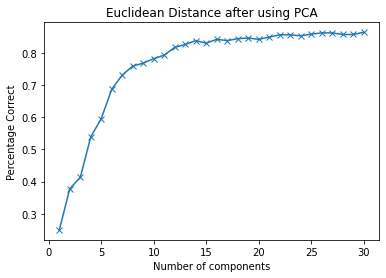

In [9]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Number of components")
ax.set_ylabel("Percentage Correct")
ax.set_title("Euclidean Distance after using PCA")
ax.plot(euclidianX,percentY, marker='x')